In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data
df = pd.read_csv("Sample - Superstore.csv",encoding = 'ISO-8859-1')

In [74]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,Weekday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Sunday


In [75]:
df.shape

(9994, 25)

In [41]:
# Ensure proper datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create additional time-related columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()

# General overview of the dataset
print(df.describe())
print(df.info())


            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [76]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Day              0
Weekday          0
dtype: int64

    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


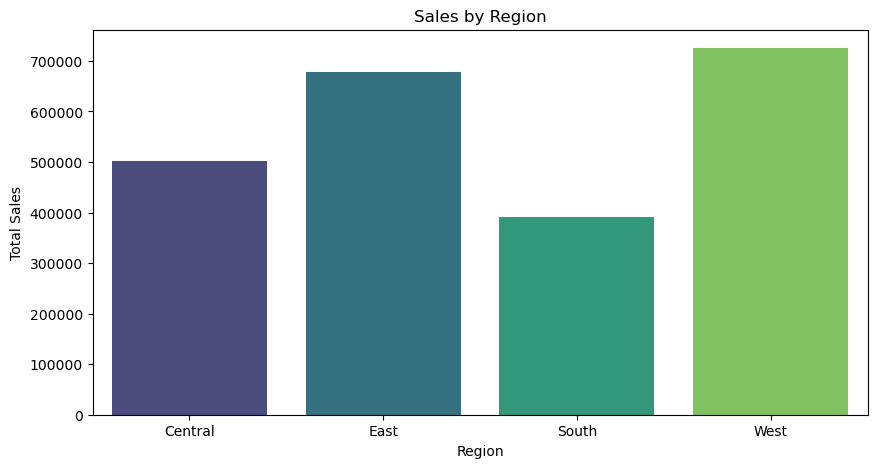

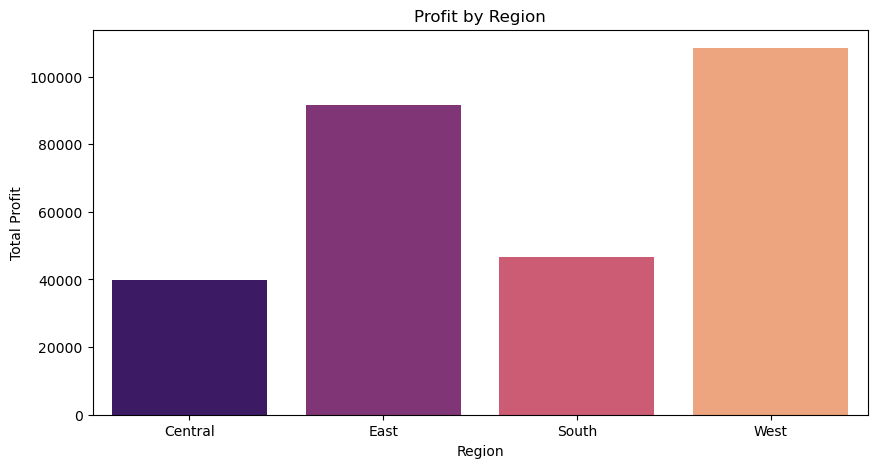

In [17]:

# ----------------------------- REGION ANALYSIS ----------------------------- #
# Total sales and profit by region
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
print(region_sales_profit)

# Visualization: Sales and profit by region
plt.figure(figsize=(10, 5))
sns.barplot(data=region_sales_profit, x='Region', y='Sales', palette='viridis')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.show()

# Visualization: Profit by region
plt.figure(figsize=(10, 5))
sns.barplot(data=region_sales_profit, x='Region', y='Profit', palette='magma')
plt.title('Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.show()


   index         State        Sales   SalesK
0      0    California  457687.6315  $ 458 K
1      1      New York  310876.2710  $ 311 K
2      2         Texas  170188.0458  $ 170 K
3      3    Washington  138641.2700  $ 139 K
4      4  Pennsylvania  116511.9140  $ 117 K
5      5       Florida   89473.7080   $ 89 K
6      6      Illinois   80166.1010   $ 80 K
7      7          Ohio   78258.1360   $ 78 K
8      8      Michigan   76269.6140   $ 76 K
9      9      Virginia   70636.7200   $ 71 K


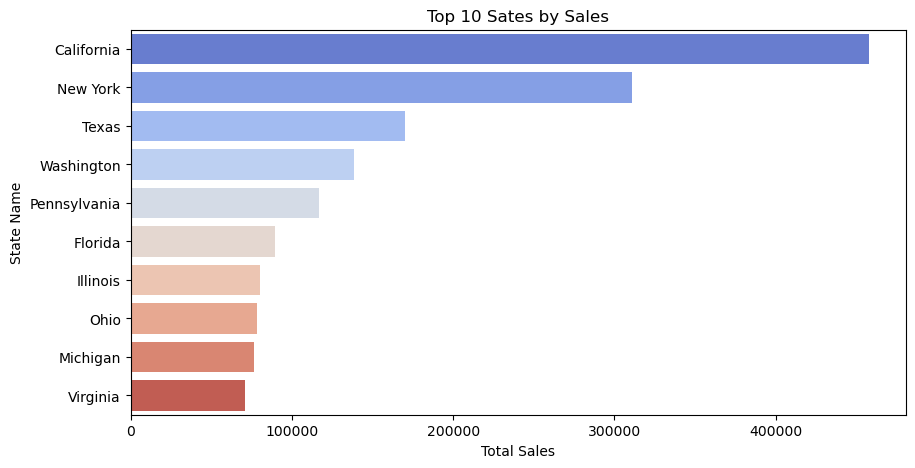

In [60]:

# Top 10 Sates by sales
top_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
top_state = top_state.reset_index()
#Generating the labels which will show the sales value in K figure
top_state['SalesK'] = ['$ '+str(round(int(v)/1000))+' K' for v in top_state.Sales]
print(top_state)

# Visualization: Top 10 Sates by sales
plt.figure(figsize=(10, 5))
sns.barplot(data=top_state, x='Sales', y='State', palette='coolwarm')
plt.title('Top 10 Sates by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State Name')
plt.show()


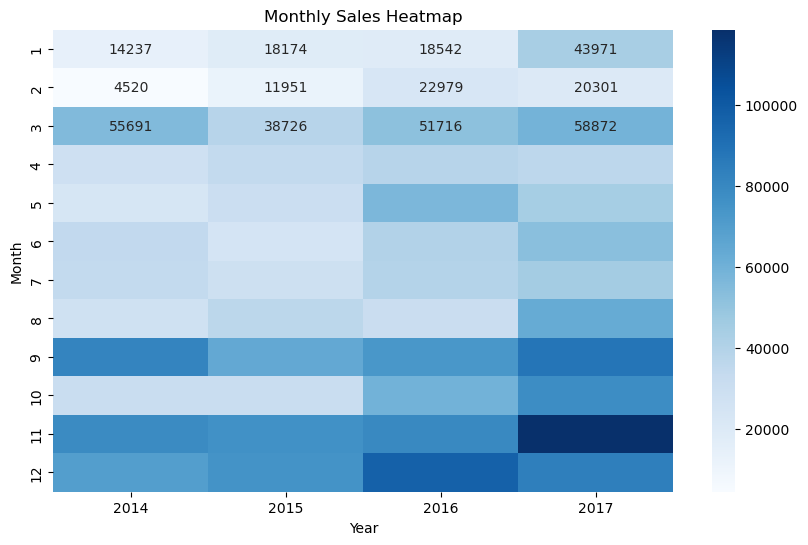

In [22]:
# ------------------------------ TIME ANALYSIS ------------------------------ #
# Monthly sales trend over years
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales_pivot = monthly_sales.pivot(index = 'Month', columns = 'Year', values = 'Sales')

# Visualization: Heatmap of monthly sales
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_sales_pivot, cmap='Blues', annot=True, fmt='.0f')
plt.title('Monthly Sales Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()



In [6]:
from scipy.signal import find_peaks

In [39]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

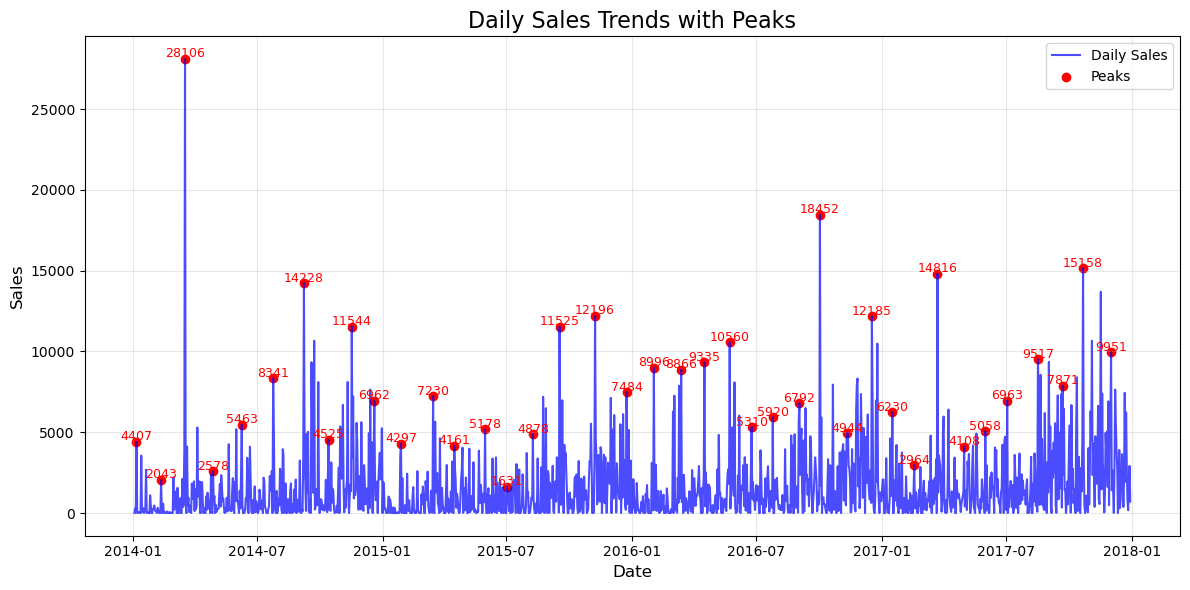

In [42]:

# Aggregate monthly sales without modifying the original dataset
daily_sales = df.groupby(pd.Grouper(key='Order Date', freq='D'))['Sales'].sum()


# Find peaks in daily sales
peaks, _ = find_peaks(daily_sales, distance=30)  # Adjust 'distance' as needed for peak sensitivity

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='blue', alpha=0.7)
plt.scatter(daily_sales.index[peaks], daily_sales.values[peaks], color='red', label='Peaks')

# Annotate peaks
for peak in peaks:
    plt.text(
        daily_sales.index[peak], 
        daily_sales.values[peak] + 100,  # Offset for clarity
        f"{int(daily_sales.values[peak])}",
        fontsize=9, color='red', ha='center'
    )

# Chart formatting
plt.title('Daily Sales Trends with Peaks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

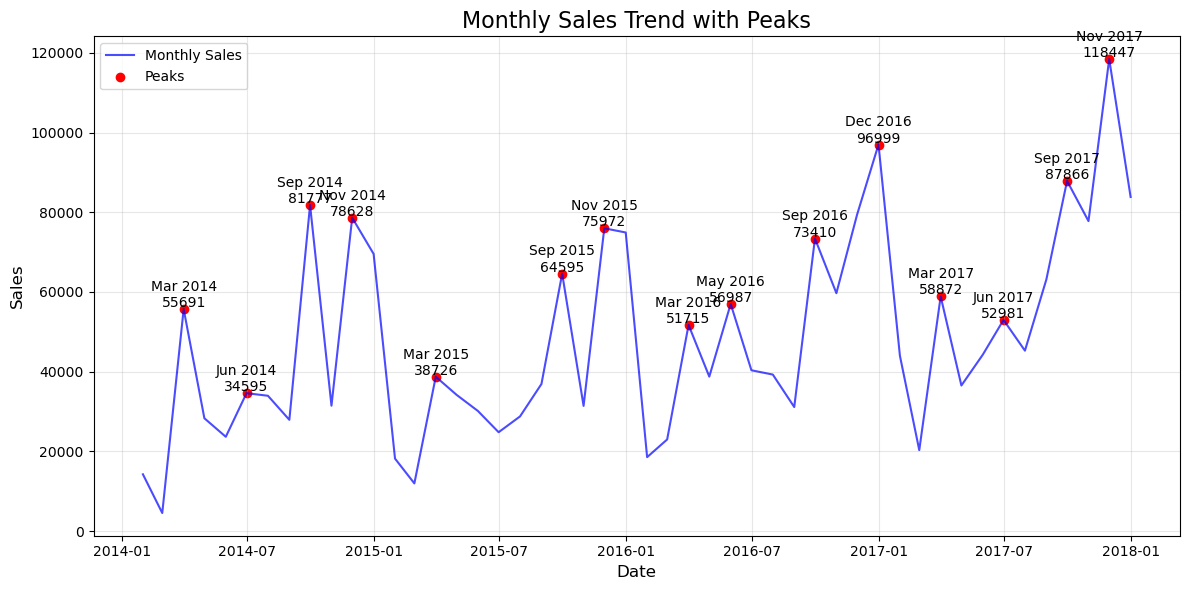

In [52]:

# Aggregate monthly sales without modifying the original dataset
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

# Find peaks in monthly sales
peaks, _ = find_peaks(monthly_sales, distance=2)  # Adjust 'distance' for peak sensitivity

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='blue', alpha=0.7)
plt.scatter(monthly_sales.index[peaks], monthly_sales.values[peaks], color='red', label='Peaks')

# Annotate peaks
for peak in peaks:
    peak_date = monthly_sales.index[peak].strftime('%b %Y')# format as month year
    peak_value = int(monthly_sales.values[peak])
    plt.text(
        monthly_sales.index[peak],
        monthly_sales.values[peak] + 500,  # Offset for clarity
        f"{peak_date}\n{peak_value}",
        fontsize=10, color='black', ha='center'
    )

# Chart formatting
plt.title('Monthly Sales Trend with Peaks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

                                        Product Name      Sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


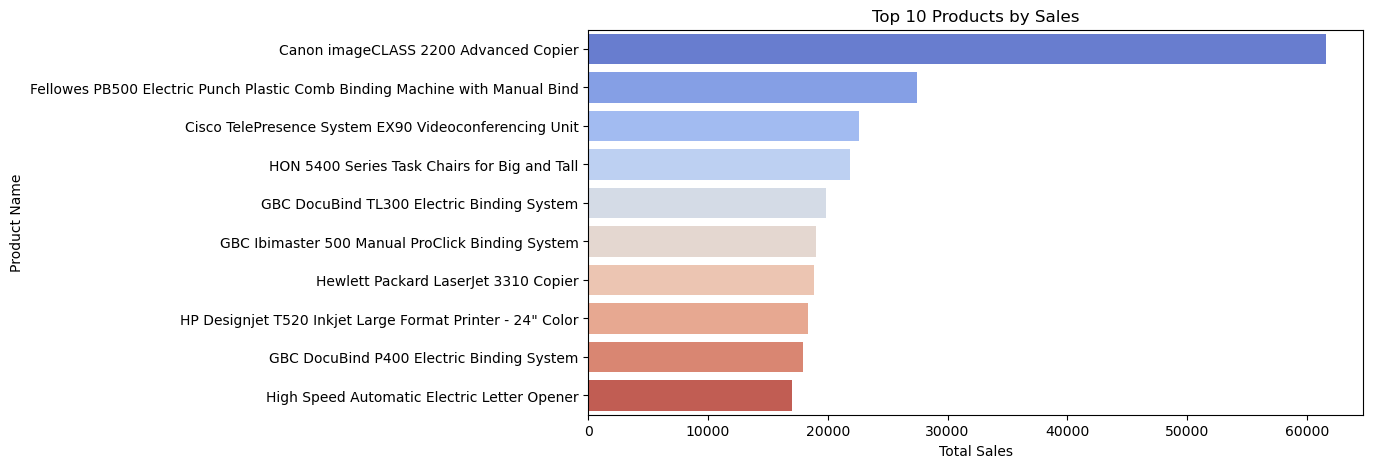

In [53]:

# ---------------------------- PRODUCT ANALYSIS ----------------------------- #
# Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_products)

# Visualization: Top 10 products by sales
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='Sales', y='Product Name', palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


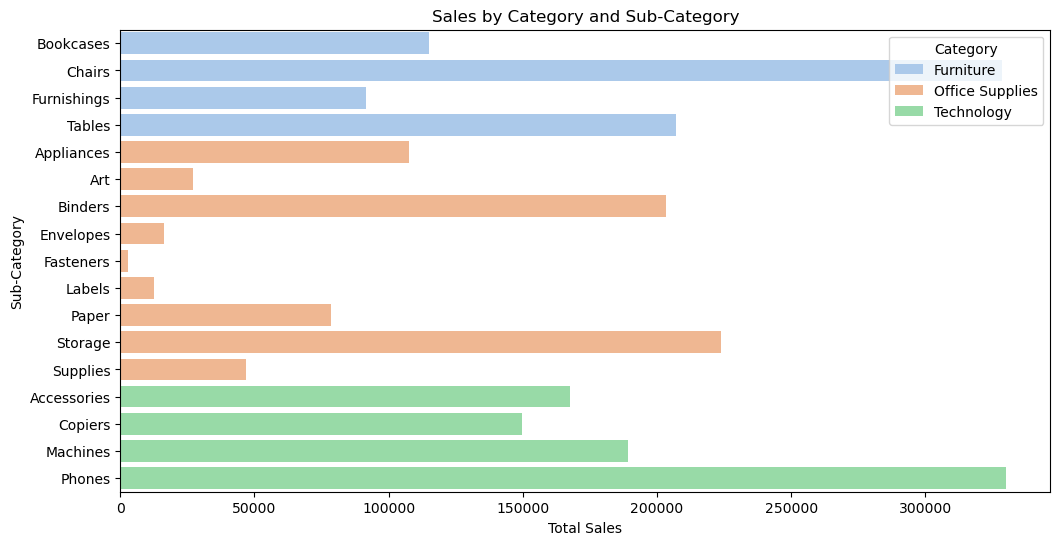

In [54]:
# Category and sub-category analysis
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Sales', y='Sub-Category', hue='Category', dodge=False, palette='pastel')
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

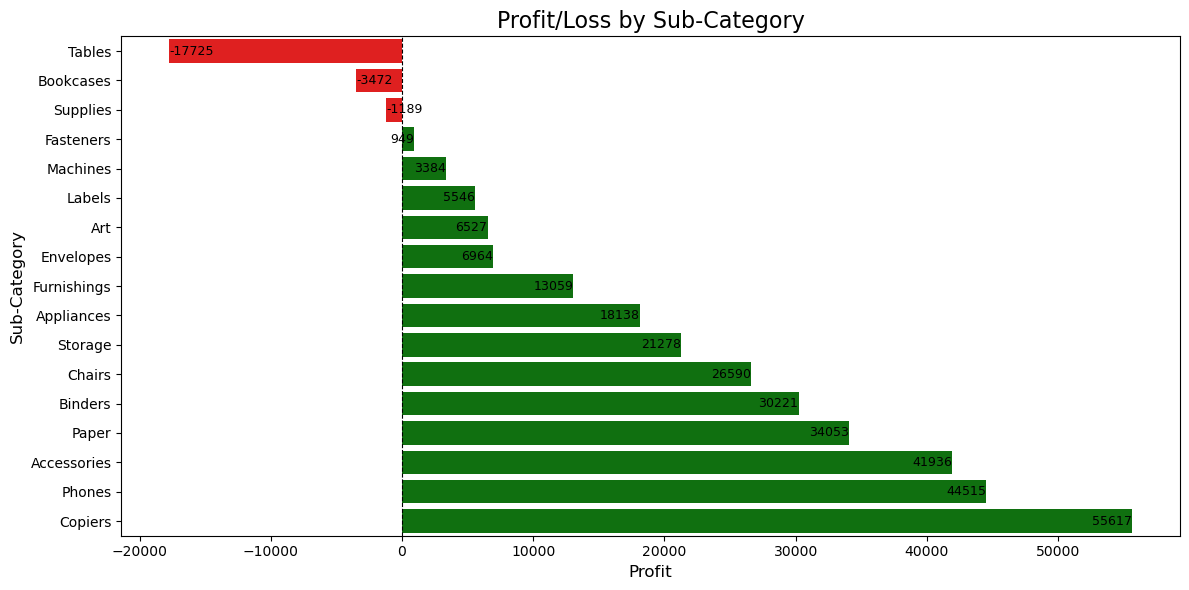

In [73]:
# Ensure 'Sub-Category' and 'Profit' columns exist
if 'Sub-Category' in df.columns and 'Profit' in df.columns:
    # Aggregate profit by sub-category
    sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()

    # Sort by profit for better visualization
    sub_category_profit = sub_category_profit.sort_values(by='Profit', ascending=True)

    # Plot bar chart for profit/loss by sub-category
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(
        data=sub_category_profit, 
        x='Profit', 
        y='Sub-Category', 
        palette=['red' if x < 0 else 'green' for x in sub_category_profit['Profit']]
    )

    # Add annotations at the tip of each bar
    for i, bar in enumerate(bar_plot.patches):
        value = sub_category_profit.iloc[i]['Profit']
        x = bar.get_width()  # Bar length
        y = bar.get_y() + bar.get_height() / 2  # Bar midpoint
        offset = 5 if value < 0 else -5  # Adjust text placement based on positive/negative values
        ha = 'left' if value < 0 else 'right'
        plt.text(x + offset, y, f"{int(value)}", color='black', va='center', ha=ha, fontsize=9)

    # Chart formatting
    plt.title('Profit/Loss by Sub-Category', fontsize=16)
    plt.xlabel('Profit', fontsize=12)
    plt.ylabel('Sub-Category', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Vertical line at 0
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Sub-Category' or 'Profit' column not found in the dataset.")

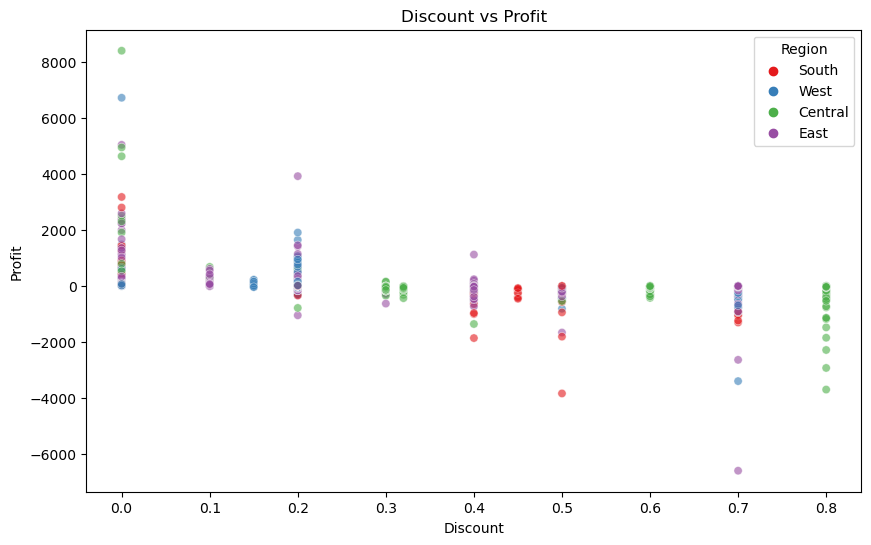

In [55]:

# --------------------------- DISCOUNT IMPACT ANALYSIS ---------------------- #
# Relationship between discount and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6, hue='Region', palette='Set1')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


       Segment         Sales
0     Consumer  1.161401e+06
1    Corporate  7.061464e+05
2  Home Office  4.296531e+05


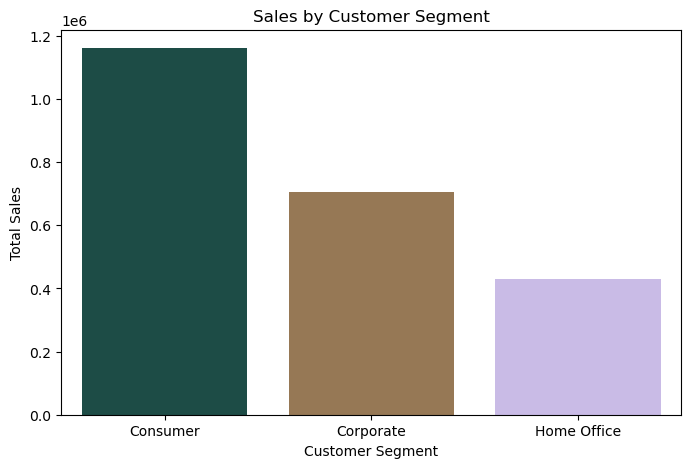

In [56]:

# --------------------------- CUSTOMER SEGMENT ANALYSIS ---------------------- #
# Sales by segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
print(segment_sales)

# Visualization: Sales by customer segment
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='cubehelix')
plt.title('Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Customer Segment')
plt.show()


                                        Product Name      Profit
0              Canon imageCLASS 2200 Advanced Copier  25199.9280
1  Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
2               Hewlett Packard LaserJet 3310 Copier   6983.8836
3                 Canon PC1060 Personal Laser Copier   4570.9347
4  HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
5                  Ativa V4110MDD Micro-Cut Shredder   3772.9461
6   3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
7  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
8               Ibico EPK-21 Electric Binding System   3345.2823
9                  Zebra ZM400 Thermal Label Printer   3343.5360


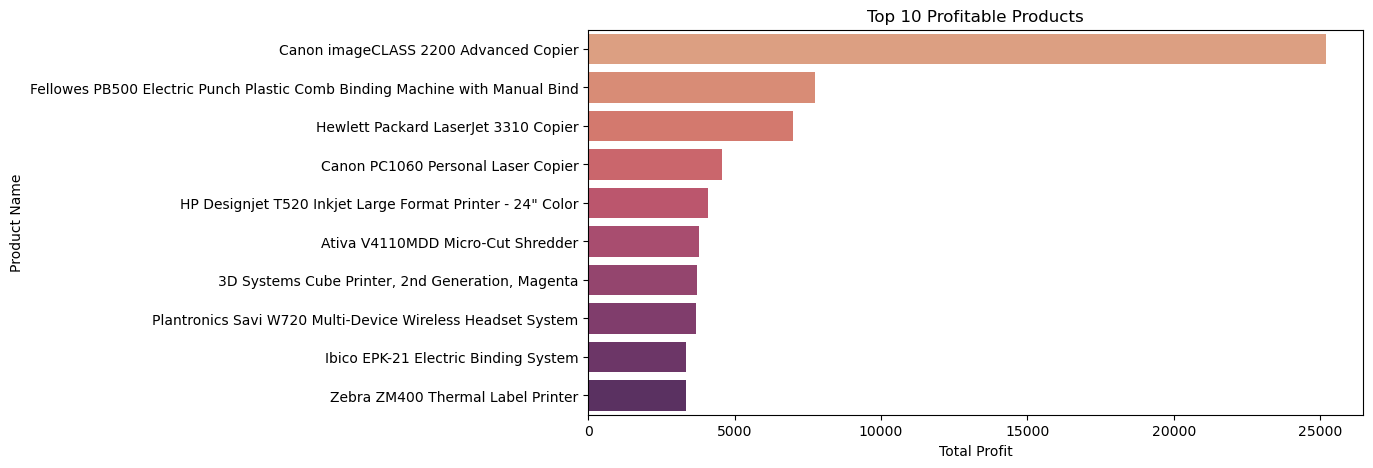

In [57]:

# --------------------------- PROFITABILITY ANALYSIS ------------------------ #
# Most profitable products
profitable_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()
print(profitable_products)

# Visualization: Most profitable products
plt.figure(figsize=(10, 5))
sns.barplot(data=profitable_products, x='Profit', y='Product Name', palette='flare')
plt.title('Top 10 Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

## Insights:

## 1. Top-Performing Sub-Categories:

Sub-categories with the highest profits (Copiers) are likely contributing the most to the overall business success it suggests these products are in high demand or have better pricing strategies.

## 2. Loss-Making Sub-Categories:

Sub-categories with negative profits (Tables) indicate areas where costs outweigh revenues.

These might result from excessive discounts, high operational costs, or low demand.


## 3. Profit Disparities:

If certain sub-categories have significantly higher profits than others, it suggests an opportunity to replicate their success (e.g., better marketing or product focus).

## 4. Room for Optimization:

Loss-making sub-categories may need cost reduction, pricing adjustments, or strategic discontinuation if they consistently underperform.

## 5. Product Line Strategy:

A diverse product portfolio can balance risks. However, too many loss-making sub-categories can drain overall profitability.


## Predictions:

## 1. Revenue Growth Potential:

Focused investments in high-performing sub-categories could lead to faster revenue growth.

For instance, expanding the product line in Copier sub category or increasing inventory could meet rising demand.

## 2. Risk of Further Losses:

If Tables sub-categories are not addressed, their negative impact could grow, especially during economic slowdowns or increased competition.

## 3. Profitability by Segment or Region:

Combining sub-category data with regional or customer segment data could predict which regions or demographics contribute the most profit. Targeted campaigns can be designed accordingly.

## 4. Price Optimization:

For loss-making products, minor price adjustments (increases or decreases) might shift them into profitability, especially if elasticity is understood.